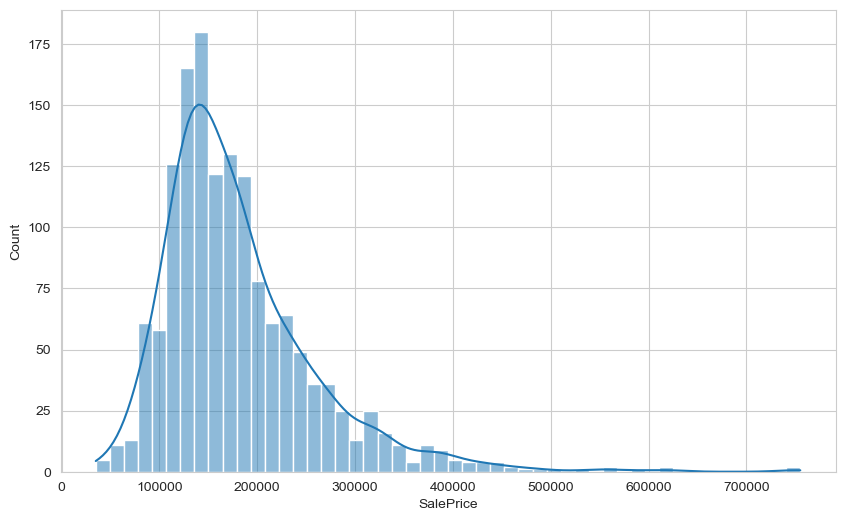

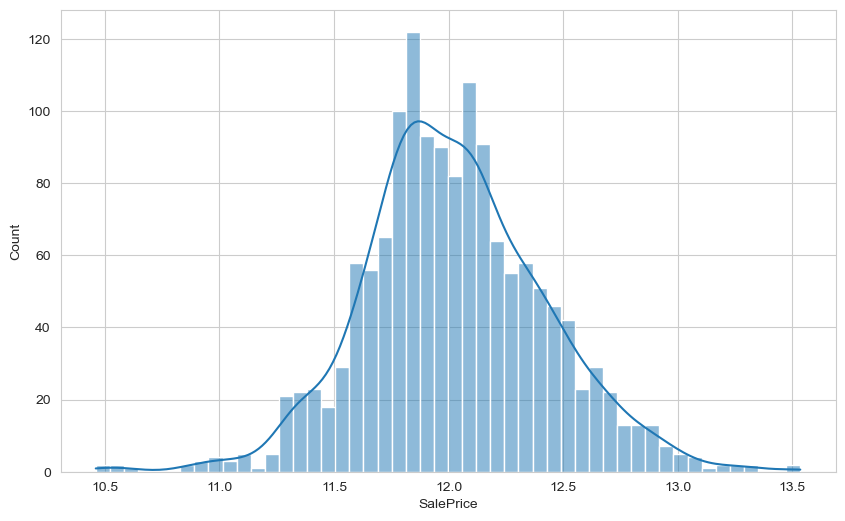

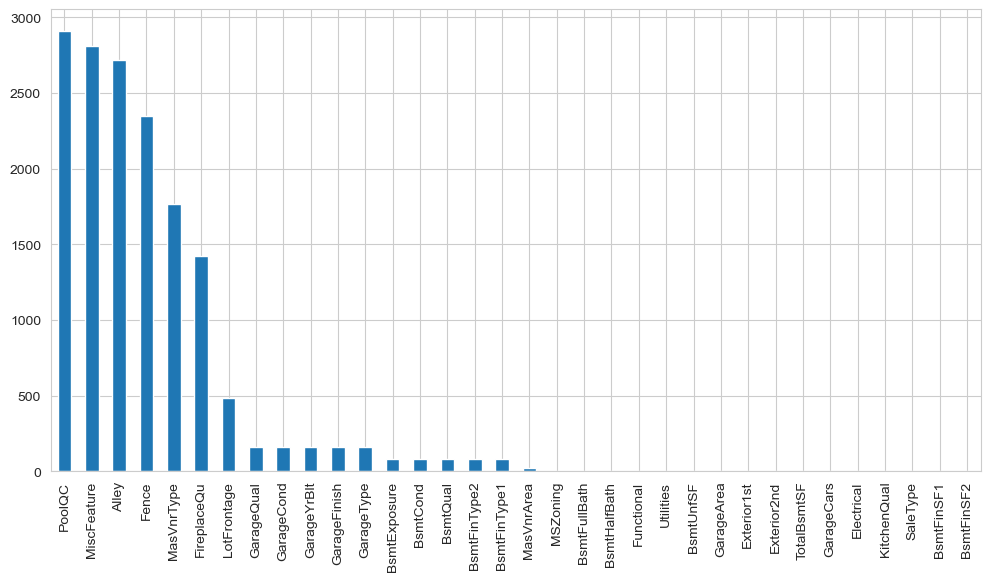

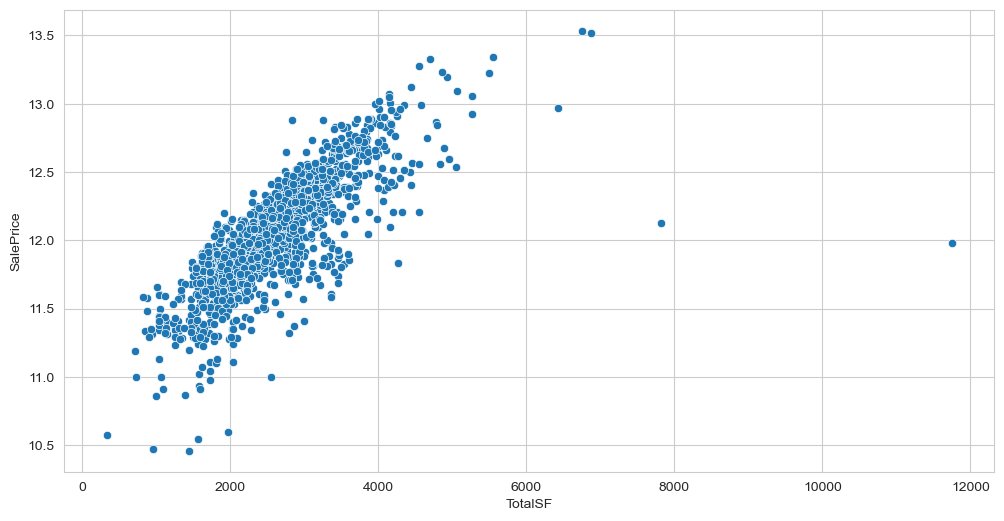

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

train = pd.read_csv(r"D:\house-prices-advanced-regression-techniques\train.csv")
test = pd.read_csv(r"D:\house-prices-advanced-regression-techniques\test.csv")
test_ids = test['Id']
all_data = pd.concat([train.drop('SalePrice', axis=1), test], axis=0).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=50)
plt.show()

train['SalePrice'] = np.log1p(train['SalePrice'])

plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=50)
plt.show()

missing = all_data.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
plt.figure(figsize=(12, 6))
missing.plot(kind='bar')
plt.show()

cat_features = all_data.select_dtypes(include=['object']).columns
num_features = all_data.select_dtypes(exclude=['object']).columns

all_data[cat_features] = all_data[cat_features].fillna('None')
all_data[num_features] = all_data[num_features].fillna(0)

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalBath'] = (all_data['FullBath'] + 
                        (0.5 * all_data['HalfBath']) + 
                        all_data['BsmtFullBath'] + 
                        (0.5 * all_data['BsmtHalfBath']))
all_data['TotalPorch'] = (all_data['OpenPorchSF'] + 
                         all_data['EnclosedPorch'] + 
                         all_data['3SsnPorch'] + 
                         all_data['ScreenPorch'])
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

cat_features = all_data.select_dtypes(include=['object']).columns
num_features = all_data.select_dtypes(exclude=['object']).columns

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalSF', y=train['SalePrice'], data=all_data.iloc[:len(train)])
plt.show()

ordinal_mapping = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,
    'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0
}

ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 
                   'GarageQual', 'GarageCond', 'PoolQC',
                   'Functional']

for feature in ordinal_features:
    if feature in all_data.columns:
        all_data[feature] = all_data[feature].map(ordinal_mapping).fillna(0).astype(int)

all_data = pd.get_dummies(all_data, columns=[col for col in cat_features if col not in ordinal_features])

X_train = all_data.iloc[:len(train)]
X_test = all_data.iloc[len(train):]
y_train = train['SalePrice']

X_train.to_csv('processed_train.csv', index=False)
X_test.to_csv('processed_test.csv', index=False)
y_train.to_csv('processed_target.csv', index=False)